In [1]:
cd /tf/astromer

/tf/astromer


In [32]:
import matplotlib.pyplot as plt
import pandas as pd
 
from core.pretrained import ASTROMER_v1


%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Loading data 

In [3]:
southern = ['RRab', 'RRc', 'RRd', 'Blazkho', 'EW', 'EA', 'Rotational Var', 'LPV', 'ACEP', 'Misc', 'CEPII']

In [4]:
metadata_df = pd.read_csv('./data/raw_data/css/CSS_dataset.dat')
metadata_df = metadata_df[metadata_df['Class'].isin(southern)]

In [5]:
ds_sample = pd.concat([group.sample(n=100) for lab, group in metadata_df.groupby('Class')])

In [6]:
times      = []
magnitudes = []
labels = []
for index, row in ds_sample.iterrows():
    lc = pd.read_csv('./data/raw_data/css/LCs/{}'.format(row['Path'].split('/')[-1]))
    lc = lc.sort_values('MJD')
    times.append(lc['MJD'].values)
    magnitudes.append(lc['Mag'].values)
    labels.append(row['Class'])

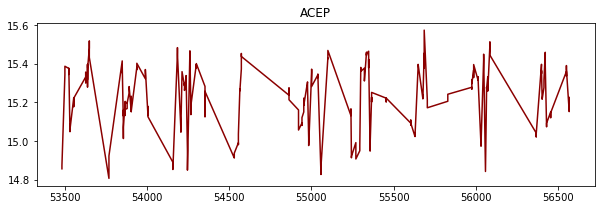

In [7]:
plt.figure(figsize=(10,3))
plt.plot(times[0], magnitudes[0], color='darkred')
plt.title('{}'.format(labels[0]))
plt.show()

### Getting attention vectors from numpy lightcurves

In [33]:
astromer = ASTROMER_v1()

In [35]:
%%time
embs = astromer.encode(times=times, magnitudes=magnitudes, batch_size=2000)

CPU times: user 28.3 s, sys: 14.9 s, total: 43.1 s
Wall time: 9.25 s
